<center><h1>🛠️ PILPaint – Building a Colorization Pipeline using Python</h1></center>

<center>👨‍💻 Project by Mubasshir Ahmed | Guided by: K. Prakash Sir</center>

---

### 📌 Project Overview

This project demonstrates how to build an image colorization pipeline using the **PIL (Pillow)** library in Python. We take a grayscale image and apply multiple colorization techniques manually using RGB channel manipulation, tinting, and blending — without using AI models.

We’ll use a real-world sample image of a **Koenigsegg Regera**, applying transformations to bring life to the grayscale version.

This hands-on mini-project simulates real-world preprocessing tasks used in ML, computer vision, and creative tools.

---

📂 **Project Name:** `PILPaint_Colorization_Project`  
🖼️ **Input Image:** `3.jpg` (Koenigsegg)  
🎯 **Goal:** Recolor grayscale images using only Python + PIL techniques  


<hr>

<h2 style="text-align:center;">🧰 Section 2 – Import Libraries and Load Input Image</h2>

In this section, we'll install and import the required libraries for image processing and display.

We’ll also load the original **Koenigsegg Regera** image from the `input/` directory to begin our colorization pipeline.

- ✅ Libraries used: `PIL`, `NumPy`, and `Matplotlib`
- ✅ Load input image using `Image.open()`
- ✅ Visualize with `matplotlib.pyplot`

> 📂 Input Path: <code>../input/3.jpg</code>

<hr>


In [1]:
!pip install pillow matplotlib numpy


In [2]:
# 🧰 Importing required libraries
from PIL import Image, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
import os

# ➤ Ensure inline display of plots
%matplotlib inline


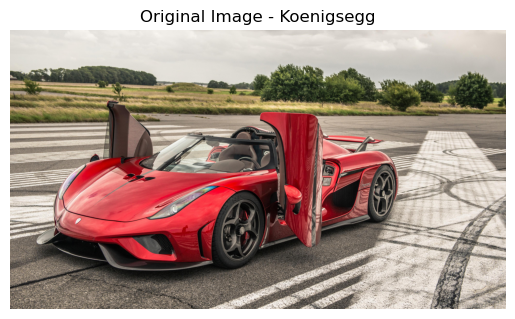

In [3]:
# 🖼️ Load the original color image
img_path = '../input/3.jpg'
original_img = Image.open(img_path)

# ➤ Show image
plt.imshow(original_img)
plt.axis('off')
plt.title("Original Image - Koenigsegg")
plt.show()


<hr>

<h2 style="text-align:center;">🌑 Section 3 – Convert to Grayscale and Save Output</h2>

In this section, we'll simulate receiving a black-and-white input image by converting the original to **grayscale** using the <code>PIL.Image.convert("L")</code> method.

This grayscale image will serve as the base input for our manual colorization pipeline.

- ✅ Convert to grayscale (8-bit pixel format)
- ✅ Visualize the result
- ✅ Save the grayscale image to the <code>output/</code> folder

> 💡 Converting to grayscale reduces the image to a single lightness channel.

<hr>


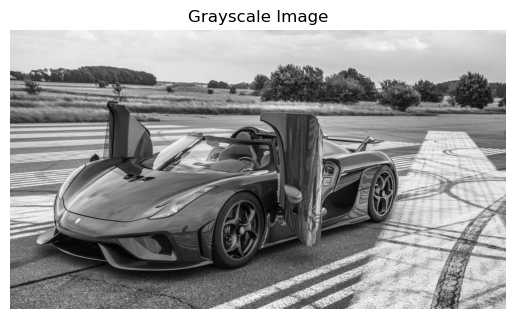

In [4]:
# 🌑 Convert to Grayscale using PIL
gray_img = original_img.convert("L")  # "L" mode = 8-bit pixels, black & white

# ➤ Show the grayscale image
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.title("Grayscale Image")
plt.show()


In [5]:
# 💾 Save grayscale image to output folder
gray_output_path = "../output/grayscale.jpg"
gray_img.save(gray_output_path)

# ➤ Confirm save
print(f"✅ Grayscale image saved to: {gray_output_path}")


✅ Grayscale image saved to: ../output/grayscale.jpg


<hr>

<h2 style="text-align:center;">🎨 Section 4 – Manual RGB Colorization Using Channel Merging</h2>

In this section, we'll begin our first colorization method by manually assigning grayscale values to each RGB channel using <code>PIL.Image.merge()</code>.

This technique simulates how color channels work by duplicating the grayscale channel into R, G, and B spaces and adjusting their intensity individually.

- ✅ Create R, G, B images from the grayscale base
- ✅ Merge them using <code>Image.merge("RGB", (R, G, B))</code>
- ✅ Save and display the manually colorized output

> 🧠 This is a basic yet powerful technique to simulate coloring without deep learning models.

<hr>


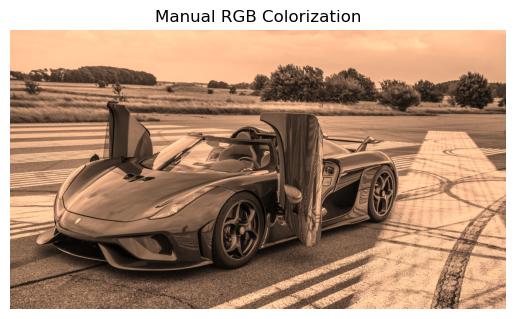

In [6]:
# 🎨 Create fake color channels from grayscale
r_channel = gray_img.point(lambda p: p * 1.2)  # Slightly enhanced red
g_channel = gray_img.point(lambda p: p * 0.9)  # Slightly reduced green
b_channel = gray_img.point(lambda p: p * 0.7)  # Reduced blue for tone shift

# Merge into RGB image
colorized_rgb = Image.merge("RGB", (r_channel, g_channel, b_channel))

# ➤ Show the manually colorized image
plt.imshow(colorized_rgb)
plt.axis('off')
plt.title("Manual RGB Colorization")
plt.show()


In [7]:
# 💾 Save the manually colorized image
rgb_output_path = "../output/colorized_rgb.jpg"
colorized_rgb.save(rgb_output_path)

# ➤ Confirm save
print(f"✅ RGB colorized image saved to: {rgb_output_path}")


✅ RGB colorized image saved to: ../output/colorized_rgb.jpg


<hr>

<h2 style="text-align:center;">🌈 Section 5 – Artistic Tinting and Color Blending</h2>

In this section, we'll experiment with creating colorized versions of our grayscale image using **tint overlays** and **channel blending techniques**.

By applying colored filters using RGB multipliers and overlays, we can simulate warm or cool color tones — often used in stylized photography and creative tools.

- ✅ Multiply grayscale with color-tint values
- ✅ Blend original and tinted layers
- ✅ Save and visualize results

> 🎨 These styles are useful for filters in creative photo editors or Instagram-like effects.

<hr>


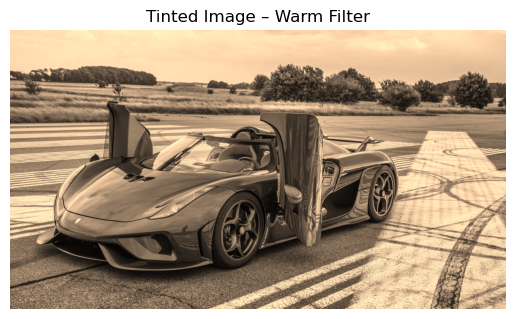

In [8]:
# 🌈 Apply a warm tone by multiplying grayscale with color constants
warm_r = gray_img.point(lambda p: p * 1.2)
warm_g = gray_img.point(lambda p: p * 1.0)
warm_b = gray_img.point(lambda p: p * 0.8)

tinted_img = Image.merge("RGB", (warm_r, warm_g, warm_b))

# ➤ Show tinted image
plt.imshow(tinted_img)
plt.axis('off')
plt.title("Tinted Image – Warm Filter")
plt.show()


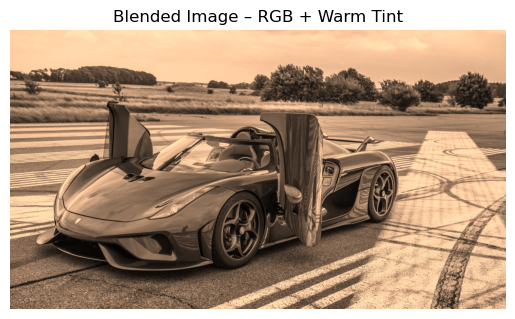

In [9]:
# 🌀 Blend grayscale and tinted version to simulate color depth
blended_img = Image.blend(colorized_rgb, tinted_img, alpha=0.5)

# ➤ Show blended result
plt.imshow(blended_img)
plt.axis('off')
plt.title("Blended Image – RGB + Warm Tint")
plt.show()


In [10]:
# 💾 Save tinted and blended versions
tinted_path = "../output/colorized_tint.jpg"
blended_path = "../output/colorized_blended.jpg"

tinted_img.save(tinted_path)
blended_img.save(blended_path)

print(f"✅ Tinted image saved to: {tinted_path}")
print(f"✅ Blended image saved to: {blended_path}")


✅ Tinted image saved to: ../output/colorized_tint.jpg
✅ Blended image saved to: ../output/colorized_blended.jpg


<hr>

<h2 style="text-align:center;">📊 Section 6 – Visual Comparison of Colorization Results</h2>

In this final section, we'll compare all versions of the image we've generated during this project side-by-side for visual analysis.

This helps us evaluate the effectiveness of:
- 🎨 Manual RGB channel colorization
- 🌈 Tint overlay coloring
- 🌀 Blending techniques

> 🔍 Such visualizations are essential when presenting results in image processing projects or research papers.

<hr>


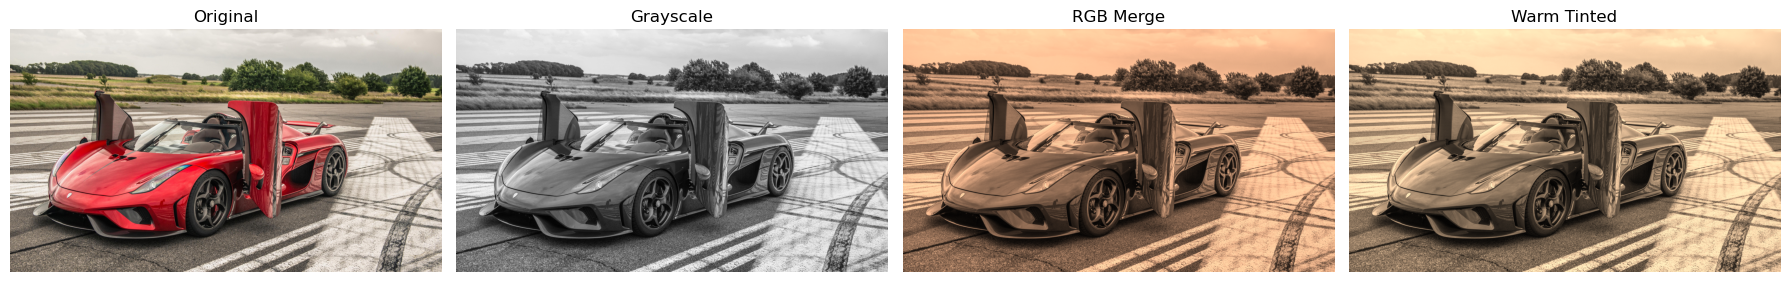

In [11]:
# 📊 Display all processed versions together for comparison
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Title row
axes[0].imshow(original_img)
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(gray_img, cmap='gray')
axes[1].set_title("Grayscale")
axes[1].axis('off')

axes[2].imshow(colorized_rgb)
axes[2].set_title("RGB Merge")
axes[2].axis('off')

axes[3].imshow(tinted_img)
axes[3].set_title("Warm Tinted")
axes[3].axis('off')

plt.tight_layout()
plt.show()


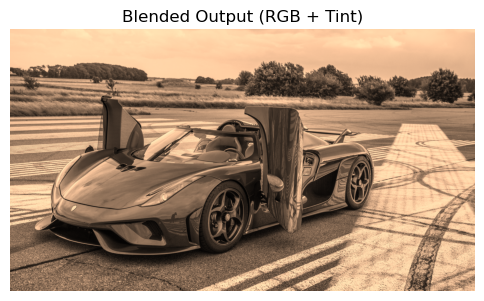

In [12]:
# ➕ Show blended version separately
plt.figure(figsize=(6, 5))
plt.imshow(blended_img)
plt.axis('off')
plt.title("Blended Output (RGB + Tint)")
plt.show()


<hr>

<h2 style="text-align:center;">🧾 Conclusion & Next Steps</h2>

In this project, we built a manual image colorization pipeline using the <code>PIL (Pillow)</code> library in Python, exploring techniques such as:

- 🎨 RGB channel manipulation for colorizing grayscale images
- 🌈 Artistic tinting using point-wise intensity scaling
- 🌀 Blending colorized layers to enhance visual depth
- 📊 Side-by-side comparisons for visual inspection

This pipeline serves as a stepping stone toward more advanced image-to-image translation techniques in deep learning such as:
- Generative Adversarial Networks (GANs)
- OpenCV color maps and histograms
- Autoencoders and colorization AI models

<hr>

<h3>📌 Key Takeaways:</h3>

- ✅ PIL is powerful even without AI
- ✅ Manual techniques help understand image composition
- ✅ You don’t always need neural networks to build useful tools

---

<h3>🚀 What’s Next?</h3>

- 🔁 Automate color tone selection based on pixel clusters
- 📦 Integrate OpenCV for more control over pixel data
- 🤖 Explore GAN-based colorization with datasets like ImageNet or CelebA

---

<blockquote><strong>Project by:</strong> Mubasshir Ahmed  
<strong>Guided by:</strong> K. Prakash sir – FSDS</blockquote>
